**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


**During Lab Tips**:
1. DO NOT write your written responses in the same markdown cell as the question. If you do this, your written response will be lost!


2. If possible, please try to use your local Jupyter Notebook to complete the lab. Online notebook editors like Collab can edit notebook source code and cause our auto-grader to break, making grading your lab more difficult for us!

**<font color='red'>WARNING: Some TODOs have `todo_check()` functions which will give you a rough estimate of whether you will recieve points or not. <u>These checks are there simply to make sure you are on the right track and they DO NOT determine your final grade for the lab</u>. They are only here to provide you with real-time feedback.</font>**

In [1]:
FIRST_NAME = "Adam"
LAST_NAME = "Nur"
STUDENT_ID = "801286783"



# Linear Regression Lab

### ITCS 5156:  Applied Machine Learning 
### Minwoo "Jake" Lee

In [2]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

        
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

# Goal 

The goal of this activity is to introduce the popular ML tool, Scikit.Learn and practice linear regression models with it. You will apply ordinary least squares (LS), regularized linear regression models (i.e., Ridge, Lasso, and Elastic net), and online regression model (stochastic gradient descent) to real data. We will prepare data as we did in last week's practice and then apply these linear models. Follow the TODO titles and comments to finish the activity!

# Agenda

* Scikit.Learn Basics
* Data Preparation
  * Data Preprocessing
  * Data Visualization
  * Data Partitioning
* Regression with  
  * Least Squares
  * Ridge Regression
  * Lasso Regression
  * Elastic Net
  * Stochastic Gradient Descent 
  

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1) 
2. [TODO2 (5 points)](#TODO2) 
3. [TODO3 (5 points)](#TODO3) 
4. [TODO4 (10 points)](#TODO4)  
5. [TODO5 (5 points)](#TODO5) 
6. [TODO6 (5 points)](#TODO6) 
7. [TODO7 (8 points)](#TODO7) 
8. [TODO8 (10 points)](#TODO8) 
9. [TODO9 (5 points)](#TODO9) 
10. [TODO10 (5 points)](#TODO10) 
11. [TODO11 (20 points)](#TODO11)
12. [TODO12 (5 points)](#TODO12)
13. [TODO13 (10 points)](#TODO13)
14. [Feedback (2 points)](#feedback)


* Total: 100 Points

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy

%matplotlib inline

# Scikit.Learn

[Scikit-learn](https://scikit-learn.org/stable/index.html) is one of the most popular machine learning tools. It is well managed by a lot of contributors and a good organizer group. The design of softeware is well developed, so it is easy to learn and apply to many different data anaylsis applications. 

By running the code cell below, if you have an error to import sklearn or the version is outdated, please follow [the instruction](https://scikit-learn.org/stable/install.html) to install/upgrade scikit-learn.

In [4]:
import sklearn
sklearn.__version__

'1.3.0'

Using scikit-learn is very simple. You can just follow five steps to use it in general:  <br/>
&nbsp;&nbsp;1) import, <br/>
&nbsp;&nbsp;2) prepare data, <br/>
&nbsp;&nbsp;3) initialize (create an object),  <br/>
&nbsp;&nbsp;4) train (fit), <br/>
&nbsp;&nbsp;5) predict (or/and evaluate).  <br/>
  
Although you have already seen examples in the slides, we can give another one here. For now, you don't know need to know what KNN is. 

In [5]:
from sklearn import datasets, neighbors           # 1) import

X, t = datasets.load_digits(return_X_y=True)      # 2) prepare data (from library embeded one)
X = X / X.max()                                   #.     - rescale the X to betweeen 0 and 1

# number of data samples
N = X.shape[0]

# prepare train and test data
i_split = int(0.8 * N)
X_train = X[:i_split]
t_train = t[:i_split]
X_test = X[i_split:]
t_test = t[i_split:]

knn = neighbors.KNeighborsClassifier()            # 3) initialize - create an KNN classifier using default setting

knn.fit(X_train, t_train)                         # 4) train with training data (input, X_train and target, t_train)

knn.score(X_test, t_test)                         # 5) evaluate the model on the entire test data and compute the accuracy


0.9638888888888889

The test accuracy seems good with 96 percent of accuracy. Well, we do not even know what the data is for, what the task is, and what ML model we used here. Let us see by actually see the data and predictions the trained model made to learn about them. 

Here, the data is famous hand-written digit recognition data. Therefore, the task is classify the image (8x8, 64 values after flattened) for right number (from 0 to 9). Here are the example codes to predict and plot the results. 

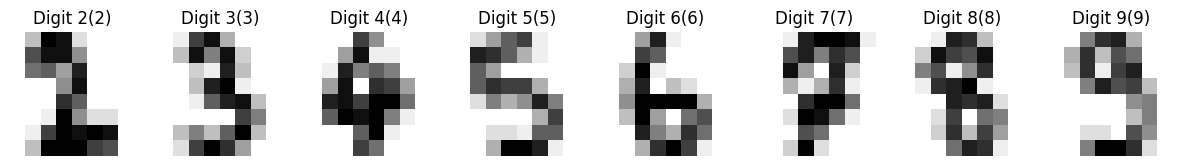

In [6]:
k = 8  # the number of data samples to check

y = knn.predict(X_test[0:k])                     # 5) predict - for the first k data samples in X_test

# plot the digits along with "label (prediction)"
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], y):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))


# Data Preparation

Well... It is a bit awkward to introduce classification example for the regression module. Let us come back to the regression problem. 

This week, we will play with the [1985 Automobile Data Set](https://archive.ics.uci.edu/dataset/10/automobile) in [UCI Data Repository](https://archive.ics.uci.edu/ml/index.html).
You can get the csv file directly from [data.csv](https://archive.ics.uci.edu/static/public/10/data.csv). 
You do not need to download the names file but you can read it to get informed about the data.

### Goal

What we want to do with this data is developing a linear regression model that predicts the symboling, a variable used by actuarians to determine the risk of buying an automobile, given other input variables.

Let us first import all the libraries that we need. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

%matplotlib inline

<div id='TODO1'></div>

## Quick checking the content of the file


Before start this TODO, make sure to download data file in the working directory. 

### TODO 1-1 (1 point)

You can use `%pfile` (all) or `!head` (Linux or Mac) or `!type` (Windows) to quickly check the content of the file. See how the file is formatted so you can get an idea of how to read. 

In [8]:
# TODO 1-1: add pfile/head/type command here
!type data.csv

normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,3
NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,3
NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,1
164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10,102,5500,24,30,13950,2
164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8,115,5500,18,22,17450,2
NaN,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250,2
158,audi,gas,s

## Reading automobile data


### TODO 1-2 (1 point)

We are repeating what we did last week, loading data using pandas. 

1. Load the data file into variable `df` using pandas library.
2. Print out the dataframe `df`.

In [9]:
# TODO 1-2:
import pandas as pd

df = pd.read_csv('data.csv')
df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


<div id='TODO1-2'></div>

### TODO 1-3 (1 point)

1. Let us look at the summary of data using `describe` again. 
2. Check the min, max, mean and standard deviation to get some idea of the value distributions.

In [10]:
# TODO 1-3:

summary_stats = df.describe()
print(summary_stats)

       normalized-losses  num-of-doors  wheel-base      length       width   
count         164.000000    203.000000  205.000000  205.000000  205.000000  \
mean          122.000000      3.123153   98.756585  174.049268   65.907805   
std            35.442168      0.994841    6.021776   12.337289    2.145204   
min            65.000000      2.000000   86.600000  141.100000   60.300000   
25%            94.000000      2.000000   94.500000  166.300000   64.100000   
50%           115.000000      4.000000   97.000000  173.200000   65.500000   
75%           150.000000      4.000000  102.400000  183.100000   66.900000   
max           256.000000      4.000000  120.900000  208.100000   72.300000   

           height  curb-weight  num-of-cylinders  engine-size        bore   
count  205.000000   205.000000        205.000000   205.000000  201.000000  \
mean    53.724878  2555.565854          4.380488   126.907317    3.329751   
std      2.443522   520.680204          1.080854    41.642693    0

### TODO 1-4 (2 points)
1. Check for any null data in the dataset.
2. Print the rows with null data.


Hint: Refer to last week's lab exercise.

In [11]:
# TODO 1-4.1:
null_data = df[df.isnull().any(axis=1)]

In [12]:
# TODO 1-4.2:
print(null_data)

     normalized-losses           make fuel-type aspiration  num-of-doors   
0                  NaN    alfa-romero       gas        std           2.0  \
1                  NaN    alfa-romero       gas        std           2.0   
2                  NaN    alfa-romero       gas        std           2.0   
5                  NaN           audi       gas        std           2.0   
7                  NaN           audi       gas        std           4.0   
9                  NaN           audi       gas      turbo           2.0   
14                 NaN            bmw       gas        std           4.0   
15                 NaN            bmw       gas        std           4.0   
16                 NaN            bmw       gas        std           2.0   
17                 NaN            bmw       gas        std           4.0   
27               148.0          dodge       gas      turbo           NaN   
43                 NaN          isuzu       gas        std           4.0   
44          

<div id='TODO2'></div>

### TODO 2 (5 points)

1. Using `SimpleImputer` in Scikit-Learn, replace the missing values (NaN) with the most frequent values in the data. Store the cleaned data into `df_freq`.

Hint: Refer to last week's lab exercise where you used the same to preprocess the garment workers productivity dataset.

In [13]:
from sklearn.impute import SimpleImputer

# TODO 2:

imputer = SimpleImputer(strategy='most_frequent')
df_freq = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_freq.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,161.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,161.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,161.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,2


Notice that the names of each column has been changed to an integer, instead of a string. Let's get them back using the below code, and store the final database in the variable `df`.

In [14]:
df_freq.columns = df.columns
df_freq.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,161.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,161.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,161.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,2


In [15]:
df = df_freq
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,161.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,161.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,161.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,2


Let's check the type of data in each column.

In [16]:
df.dtypes

normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
symboling            object
dtype: object

Notice that the type of data in each column is changed to object. Let's revert back them to numbers, which makes our work a lot easier.

In [17]:
numeric_columns = ['normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 
                   'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 
                   'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'symboling']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.dtypes

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
dtype: object

The list of column names in the variable `numeric_columns` are the ones which have numbers stored in them in the original data. The data in these column types is simply changed from type `object` to `int/float` by using the pandas function [to_numeric()](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html).

But, what about the remaining data that is still present in the object form, to be specific, in the form of strings?

Remember, in the last week's lab, we've converted each of them by manually assigning an integer to each string, and then modified the dataset using the pandas `apply()` and `lambda` functions. This task can be easily achieved by using `labelEncoder` function in the scikit-learn library.

<div id='TODO3'></div>

### TODO 3 (5 points)

1. Convert the data present in the form of strings in `df` to integer format using `labelEncoder` function. The list of columns with string data is given to you in the form of a list stored in `strings_list` variable.
2. Hint: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html),  [Reference](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)

In [18]:
strings_list = ['make', 'fuel-type', 'aspiration', 'body-style', 
                'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

from sklearn import preprocessing

# TODO 3:
for col in strings_list:
    label_encoder = preprocessing.LabelEncoder()
    df_freq[col] = label_encoder.fit_transform(df_freq[col])

print(df_freq)

     normalized-losses  make  fuel-type  aspiration  num-of-doors  body-style   
0                161.0     0          1           0           2.0           0  \
1                161.0     0          1           0           2.0           0   
2                161.0     0          1           0           2.0           2   
3                164.0     1          1           0           4.0           3   
4                164.0     1          1           0           4.0           3   
..                 ...   ...        ...         ...           ...         ...   
200               95.0    21          1           0           4.0           3   
201               95.0    21          1           1           4.0           3   
202               95.0    21          1           0           4.0           3   
203               95.0    21          0           1           4.0           3   
204               95.0    21          1           1           4.0           3   

     drive-wheels  engine-l

In [19]:
df.dtypes

normalized-losses    float64
make                   int32
fuel-type              int32
aspiration             int32
num-of-doors         float64
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int64
engine-size            int64
fuel-system            int32
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
dtype: object

Notice that our whole data has now been changed into numerical format, either in the form of int or float. This makes our work a lot easier when we go to advanced stages like training and testing a model. The preprocessed dataset is shown in the below cell.

In [20]:
df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,161.0,0,1,0,2.0,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,161.0,0,1,0,2.0,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,161.0,0,1,0,2.0,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,1,1,0,4.0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,1,1,0,4.0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,21,1,0,4.0,3,2,0,109.1,188.8,...,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,95.0,21,1,1,4.0,3,2,0,109.1,188.8,...,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,95.0,21,1,0,4.0,3,2,0,109.1,188.8,...,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,95.0,21,0,1,4.0,3,2,0,109.1,188.8,...,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


## Visualize the data

Working for a linear regression, knowing the how the target value varies depending on input variables. So, by using scatter plot, let us see if there is positive or negative correlation between any input feature and the target value. 

<div id='TODO4'></div>

### TODO 4-1 (3 points)

1. In the last week's lab, we created 3 by 4 scatter plots. Similarly, create 5 by 5 scatter plots, each plotting the target value (symboling) against individual input variable. 

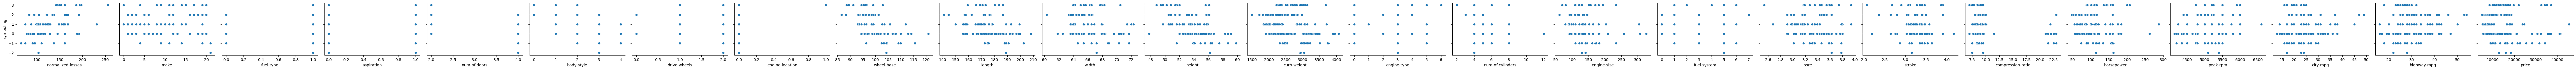

In [21]:
# TODO 4-1:
import matplotlib.pyplot as plt
import seaborn as sns

input_columns = ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
                'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

target_column = 'symboling'

pair_plot_data = df_freq[input_columns + [target_column]]
sns.pairplot(pair_plot_data, x_vars=input_columns, y_vars=[target_column], aspect=1.5)
plt.show()

Often, rather than just looking at how each feature interacts with the target, observing how each feature interacts with other features can be useful as well. One of the reasons for this is that we can begin to gain a glimpse at the dependency between features. If two highly correlated features exist, we can easily ignore one of them as using both would be redundant. Let say you have two input variable $𝑥1$ and $𝑥2$ and $𝑥2=2×𝑥1$. Then, your linear model $𝑦=𝑤1𝑥1+𝑤2𝑥2+𝑏$ can be easily converted to $𝑦=3𝑤𝑥1+𝑏$.

### TODO 4-2 (2 points)

1. Now, create a scatter plot which plots all the features against one another by using the Pandas `scatter_matrix()` function with our DataFrame `df`.

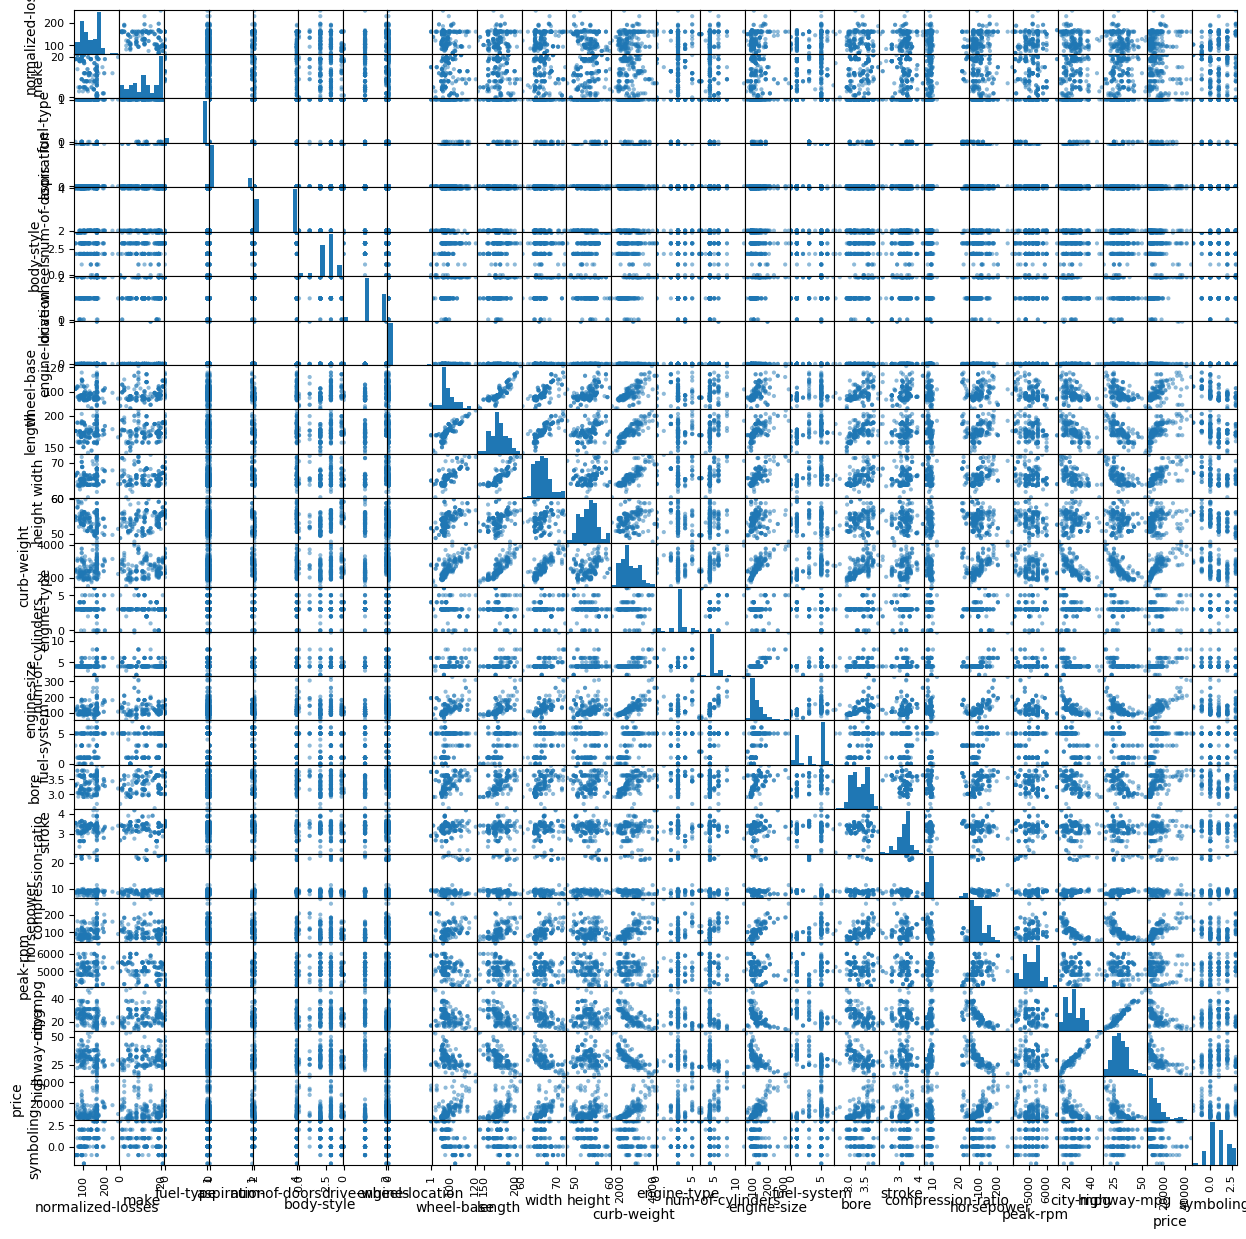

In [22]:
# TODO 4-2:
from pandas.plotting import scatter_matrix

scatter_matrix(df_freq, alpha=0.5, figsize=(15, 15), diagonal='hist')
plt.show()

From above figures, we can see the target 'symboling' is a categorical value ranging from -2 to 3. Let us verify this using the following code.

In [23]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

Yes, it is one of the six values, which  means we can use classification algorithms. We will talk about classification later but we can see how they are grouped together using Andrew's curve. Andrew's curve maps the high dimensional data into frequency plot using finite Fourier series. Therefore, you are expected to observe similar frequncy patterns in the graph for the similar data.  You can check David Andrew's paper ([Plots of High-Dimensional Data](https://www.jstor.org/stable/2528964), 1972). 

### TODO 4-3 (3 points)

1. Using Pandas `andrews_curve()` function in conjunction with our DataFrame `df` to produce the Andrew's curve. Take some time to observe the plot.
    1. Try using different colours for each target value.

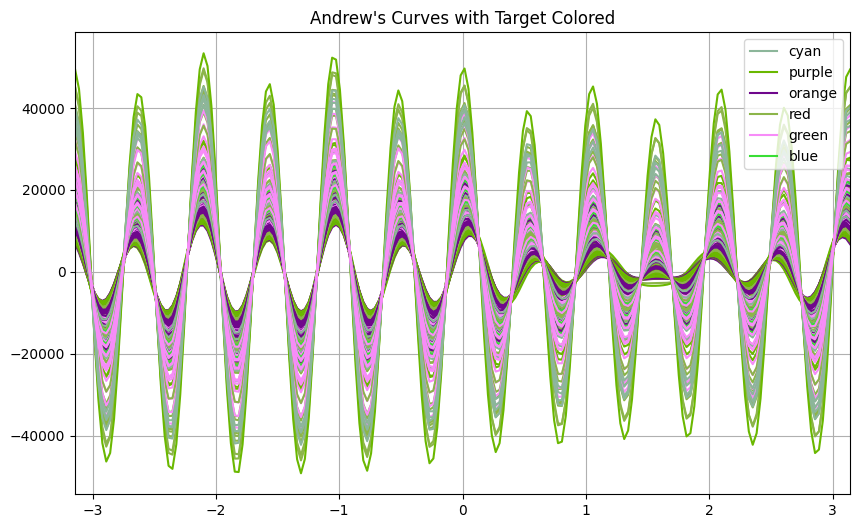

In [24]:
# TODO 4-3:
from pandas.plotting import andrews_curves

colors = {
    -2: 'blue',
    -1: 'green',
    0: 'red',
    1: 'purple',
    2: 'orange',
    3: 'cyan',
}

df_freq['color'] = df_freq['symboling'].replace(colors)

plt.figure(figsize=(10, 6))
andrews_curves(df_freq, 'color')
plt.title("Andrew's Curves with Target Colored")
plt.show()

What can you see from the plot? 

Well, there are large data samples overlap, so between -2 to 0, it is hard to see anything particular. Some samples in the symboling 1 and 3, however, sticks out a little, which will be interesting how this will impact on ML model performance.

Now, let us look at the target values. 

### TODO 4-4 (2 points)

1. Create the histogram using our target represented by the 'symboling' column in our `df`. Take some time to observe the plot.
    1. Hint: You can use Pandas or Matplotlib to  generate this plot.

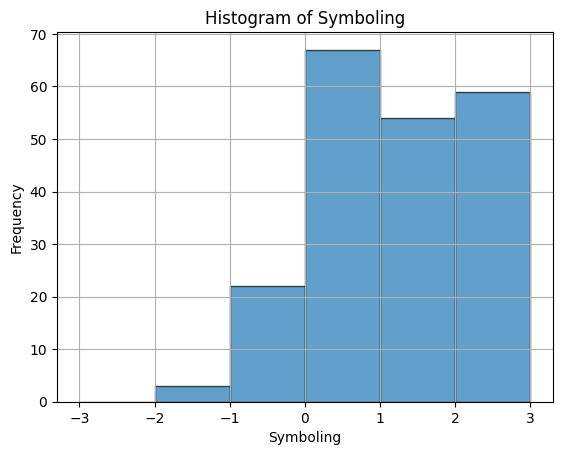

In [25]:
# TODO 4-4:
plt.hist(df_freq['symboling'], bins=range(-3, 4), edgecolor='k', alpha=0.7)
plt.xlabel('Symboling')
plt.ylabel('Frequency')
plt.title('Histogram of Symboling')
plt.grid(True)
plt.show()

You can see the figure now shows the majority of automobiles are with symboling 0 and 1. Let us see how this sample imbalance will impact the model performance. 

## Splitting data into input features and targets

Let us have two separate variables for input features and output targets. 
`X` will be used for the input features, `T` for target labels, and `N` for the total number of samples in our data.


<div id='TODO5'></div>

### TODO 5-1 (3 points)

1. Store the target column 'symboling' into `T`.
2. Store all the input input features into `X`, excluding the target column `symboling`.
3. Store the total number of samples in our dataset (e.g., rows) into `N`.

In [26]:
# TODO 5-1:

T = df_freq['symboling']
X = df_freq.drop(columns=['symboling', 'color'])
N = df_freq.shape[0]

In [27]:
todo_check([
    ('"X" in globals()', 'X is not defined'),
    ('np.all(np.isclose(X.iloc[10, 1:5].values, np.array([2.0, 1.0, 0.0, 2.0])))', 'X has incorrect values'),
    ('"T" in globals()', 'T is not defined'),
    ('np.all(np.isclose(T.iloc[5:10].values, np.array([2, 1, 1, 1, 0])))', 'T has incorrect values'),
    ('"N" in globals()', 'N is not defined'),
    ("N == 205", "N has the wrong value")
])

Your code PASSED the code check!


### TODO 5-2 (2 points)

1. Split the data `X` and targets `T` using Sklearn's `train_test_split()` function. Store the values into `X_train`, `X_test`, `t_train`, and `t_test`. Be sure to pass the arguments that correspond to the following descriptions:
    1. Split the data/targets using a 80/20 split (80% for training and 20% for testing).
    1. Use a seed of 0 for the `random_state` argument.

In [28]:
# TODO 5-2:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(205, 25) (164, 25) (41, 25) (164,) (41,)


In [29]:
todo_check([
    ("X_train.shape == (164, 25)", "X_train has the wrong shape"),
    ("X_test.shape == (41, 25)", "X_test has the wrong shape"),
    ("t_train.shape == (164,)", "t_train has the wrong shape"),
    ("t_test.shape == (41,)", "t_test has the wrong shape"),
])

Your code PASSED the code check!


# Applying Least Squares
Now it's time to apply least squares to our data in an attempt to develop a model for predicting our target variable `symboling`! Recall that the least squares formula is used to generate weights $w$ which can then be used for making predictions given new data. The least squares formula is given below where the symbol $\cdot$ corresponds to the dot product.

$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot T
$$

**References**

If you want to gain a better understanding of what least squares is doing check out the following references.
* [ Khan Academy](https://www.youtube.com/watch?v=MC7l96tW8V8)
* [Geometric view](https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b)

<div id='TODO6'></div>

### TODO 6 (5 points)

Well, the model is implemented in `sklearn.linear_model`. 

1. Create an instance using the proper Sklearn class for conducting least squares. Store the output into `model`. 
    1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides. 
2. Train the least squares model using the `X_train` and `t_train`.
3. Evaluate the model by computing the test scores using the `score()` method with the `X_test` data and `t_test` targets. Store the output into `test_score`.


In [30]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

# TODO 6:

# 1) initialize
model = LinearRegression()

# 2) train the modelmodel.fit(X_train, t_train)
model.fit(X_train, t_train)

# 3) evaluate
test_score = model.score(X_test, t_test)

print("Test score: ", test_score)

Test score:  0.3879966145620023


In [31]:
todo_check([
    ('np.isclose(test_score,  0.387996, rtol=.1)', '`score` potentially has the wrong value.')
])

Your code PASSED the code check!


The `score` function calculated the coeffient $R^2$:
$$
 R^2 = 1 - \frac{(t - y)^2}{(t - \bar{t})^2}
$$
where $t$ is target label, $y$ is predicted values, and $\bar{t}$ is mean of target labels. 
When the model is perfect fit, $R^2 =1$. Knowing that, the model seems to be a bit weak. Let us check this with the following plots. 

<div id='TODO7'></div>

First, let us see how close the prediction is to the actual label by comparing the value against the diagonal line after plotting a scatter plot between them (See the figure below). If the predictions are accurate, all the points should lie on the diagonal line. 

### TODO 7-1 (3 points)
1. call `predict()` method to make predictions for `X_test` input and store the results to `y`.  
2. Plot `t_test` (x-axis) against `y` (y-axis).
3. Based on your plot and results, briefly state what you think/observe.

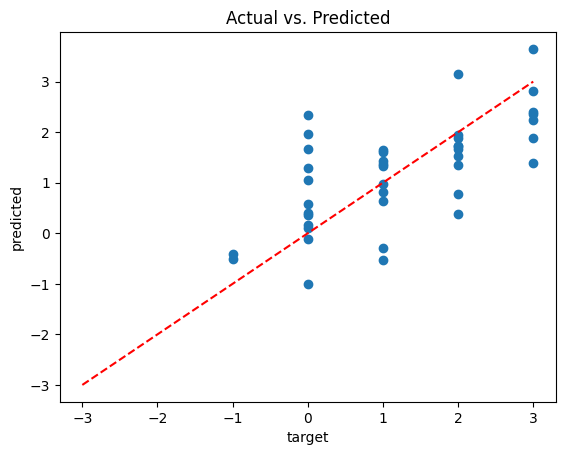

In [32]:
# TODO 7-1:

## TODO 1. make a prediction
y = model.predict(X_test)

## TODO 2. plot t_text vs y 
plt.scatter(t_test, y)
# dashed diagonal line
plt.plot([-3,3], [-3,3], 'r--')
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("Actual vs. Predicted")
plt.show()

In [33]:
todo_check([
    ("y.shape == (41,)", "y shape is incorrect"),
    ("np.all(np.isclose(y[1:5], np.array([-0.51629084, 1.938767, 1.35099362, 0.77757691])))", "y values are incorrect")
])

Your code PASSED the code check!


Here the red-diagonal line represents where the blue dots should fall if our classifier achieved 100% accuracy.

### TODO 7-2 (5 points)

Write your thoughts about the results and plots in the below cell.

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:` It seems that the predicited data set isnt entirley accuarate but its somewhat right enough because it dosent deviate from the dotted line TOO much

If you want to look at all the data samples plotted *with* their corresponding predictions, you can plot all the samples as in the code below. 

Text(0, 0.5, 'symboling')

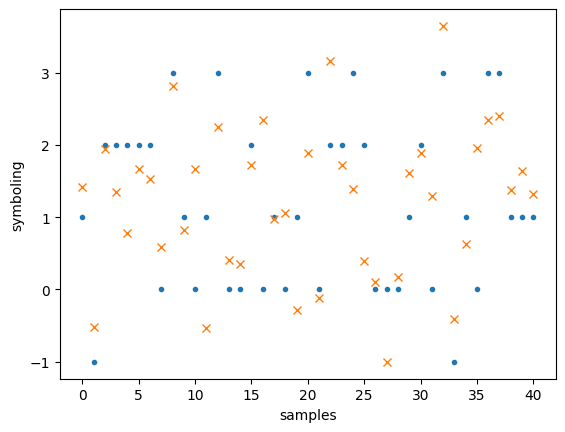

In [34]:
plt.plot(t_test.to_numpy(), '.')
plt.plot(y, 'x')
plt.xlabel("samples")
plt.ylabel("symboling")

Well, this above plot is a bit messy when we look at the results here. Let us plot each data sample in its own plot based on the  target value. 

<div id='TODO8'></div>

### TODO 8 (10 points)

1. Create a sub-plot where each plot, plots the actual symboling target `t_test` (blue dot) against its predicted target `y` (orange x).
  1. Hint: You will need to use sub-plots similar to TODO 4-1. 
  1. Hint: Notice, there are 5 unique values in `t_test`, thus you will need 5 sub-plots, one for each unique value in `t_test`. For example, let's say we have 2 data samples with the symboling '-1' in `t_test`. The plot for symboling '-1' should then plot the actual targets against the predicted targets (a total of 4 points should be plotted, 2 blue dots, 2 orange x's).
2. Write your thoughts about what you observe from the figures. 

Recall, `t_test` is a Pandas Series (1D DataFrame) and `y` is a numpy array!

In [35]:
t_test.unique()

array([ 1, -1,  2,  0,  3], dtype=int64)

In [36]:
print(f"t_test type {type(t_test)}")
print(f"y type {type(y)}")

t_test type <class 'pandas.core.series.Series'>
y type <class 'numpy.ndarray'>


Further, recall that the unique values inside `t_test` are as follows! Notice the symboling '-1' appears 2 times while the quality '2' appears 10 times.

In [37]:
uniques, counts = np.unique(t_test, return_counts=True)

print(f"Unique values in t_test: {uniques}")
print(f"Number of times each unqiue value appears in t_test: {counts}")

Unique values in t_test: [-1  0  1  2  3]
Number of times each unqiue value appears in t_test: [ 2 12 10 10  7]


Plotting the actual vs predicted for target '-1' might look as follows:

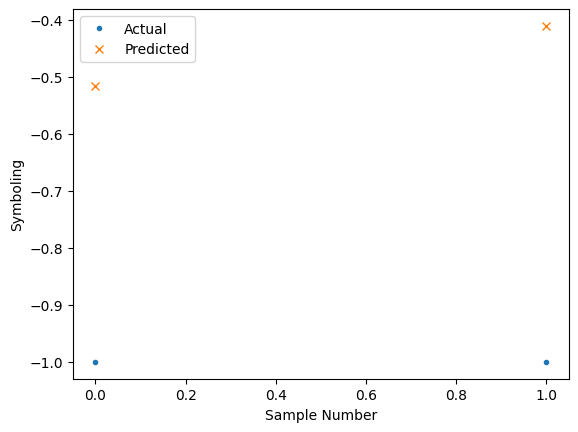

In [38]:
plt.plot(t_test.values[t_test==-1], '.', label="Actual")
plt.plot(y[t_test==-1], 'x', label="Predicted")
plt.ylabel("Symboling")
plt.xlabel("Sample Number")
plt.legend()

Finish the code for TODO 8 in the cell below.

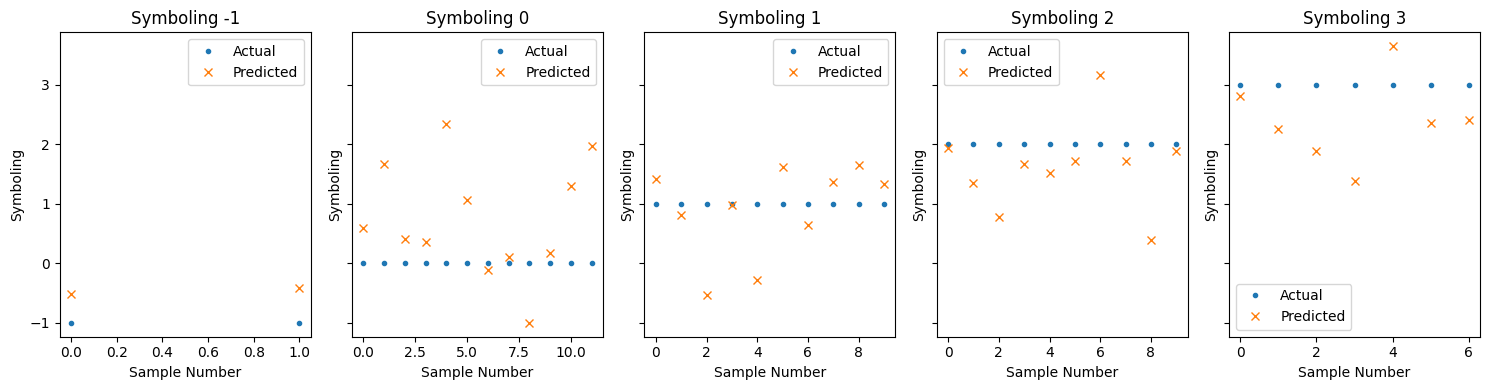

In [39]:
# TODO 8:
uniques, counts = np.unique(t_test, return_counts=True)

fig, axes = plt.subplots(1, len(uniques), figsize=(15, 4), sharey=True)

for i, unique_symboling in enumerate(uniques):
    ax = axes[i]
    ax.plot(t_test.values[t_test == unique_symboling], '.', label="Actual")
    ax.plot(y[t_test == unique_symboling], 'x', label="Predicted")
    ax.set_ylabel("Symboling")
    ax.set_xlabel("Sample Number")
    ax.set_title(f"Symboling {unique_symboling}")
    ax.legend()

plt.tight_layout()
plt.show()

Write your thoughts about the results and plots in the below cell.

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:` The Model preforms differently with every kind of symboling. As 1 and 2 is better than 0 also -1 and 3 have significantly less samples than the others


As we'll be using other linear models throughout this notebook it will be nice to condense all the plots for examining our targets and predictions into one easy to call function. So, let's make a function that does this. We'll call it `evaluate`. 

<div id='TODO9'></div>

### TODO 9 (5 points)

Finish coding the `evaluate()`function given below.

1. Plot `t_test` (x-axis) against `y` (y-axis) by calling the function we finished in TODO 7.1.
2. Plot all the data samples `t_test` *with* their corresponding predictions `y` using the function we defined for you a few code cells earlier.
3.  Create a sub-plot where each plot, plots the actual target `t_test` (blue dot) against its predicted target `y` (orange x) as we did in TODO 8.
4. Maintaining the subplot structure as it is, fill in the blank to finish the function.

In [40]:
def evaluate(y, t):
    unique_symbols, _ = np.unique(t, return_counts=True)
    num_subplots = len(unique_symbols) + 2  
    num_cols = 2
    num_rows = (num_subplots + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 4 * num_rows))


    plt.subplot(num_rows, num_cols, 1)
    plt.scatter(t, y)
    plt.plot([-3, 3], [-3, 3], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Plot-1")

    plt.subplot(num_rows, num_cols, 2)
    plt.plot(t, '.', label="Actual")
    plt.plot(y, 'x', label="Predicted")
    plt.ylabel("Symboling")
    plt.xlabel("Sample Number")
    plt.legend()
    plt.title("Plot-2")

    for i, symbol in enumerate(unique_symbols):
        plt.subplot(num_rows, num_cols, i + 3)
        plt.plot(t[t == symbol], '.', label="Actual")
        plt.plot(y[t == symbol], 'x', label="Predicted")
        plt.ylabel("Symboling")
        plt.xlabel("Sample Number")
        plt.legend()

    plt.tight_layout()

When finishing the function, you can call the function as below:

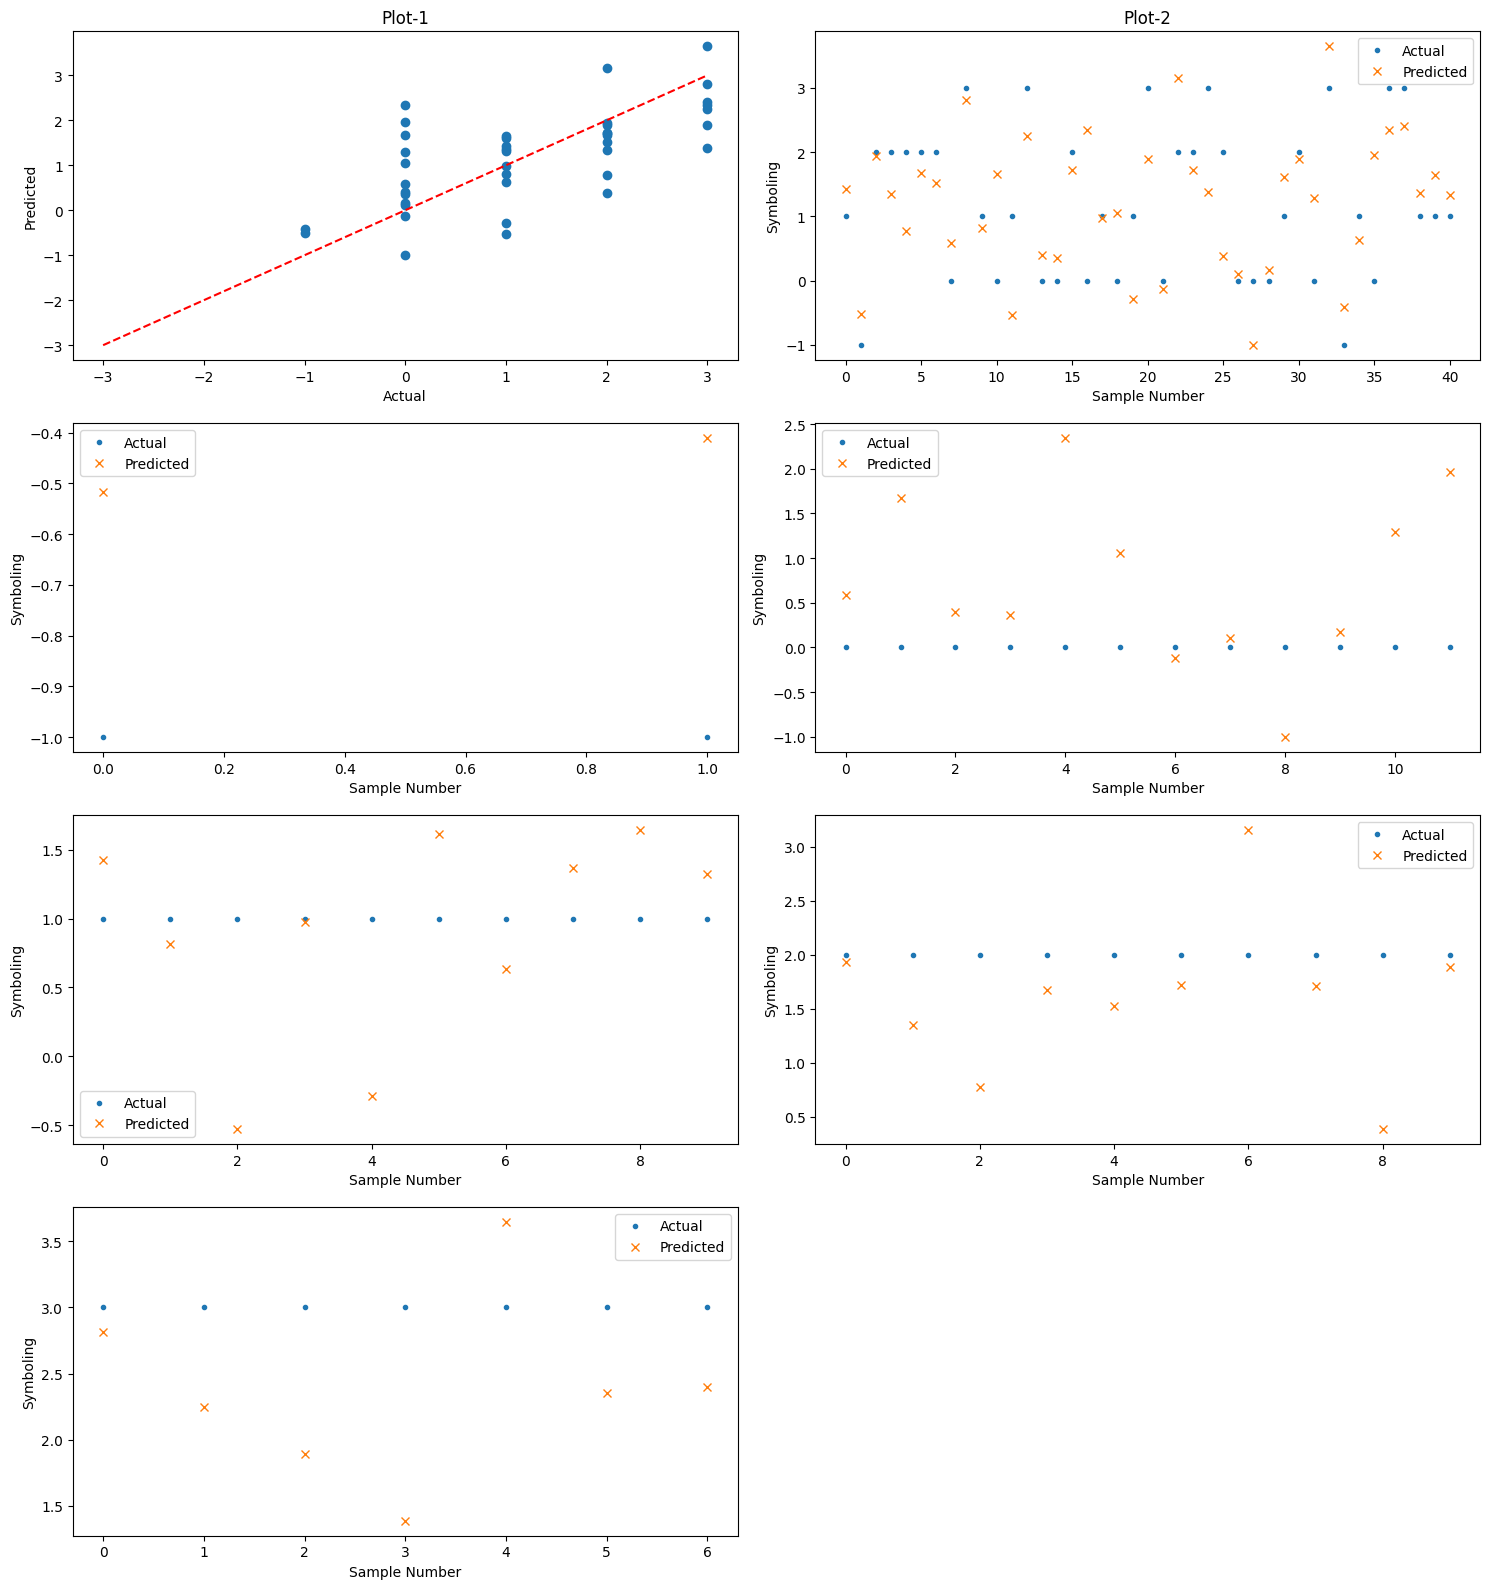

In [41]:
evaluate(y, t_test.to_numpy())

Can you take a guess to what these values we are accessing from our `model` correspond to?

In [42]:
model.coef_

array([ 1.26736375e-02,  7.16060903e-03,  4.49154211e+00,  2.53028075e-01,
       -4.75232406e-01,  4.54172318e-02, -4.39768394e-01, -1.60714368e-01,
       -1.54654760e-01,  8.20412850e-03,  1.42359986e-01,  2.46358470e-02,
       -5.31581287e-04, -4.55048578e-02, -6.70270696e-01,  1.88724059e-02,
        6.54111688e-02, -5.71760198e-01,  9.61436623e-02,  3.37294409e-01,
       -1.02332936e-02, -2.11871124e-04, -1.07786716e-01,  5.19049770e-02,
        5.25894531e-05])

In [43]:
model.intercept_

2.6830635783769132

## Weight Observation

The previous cells print out some parameters from our model, specifically the weights and y-intercept (bias value) for our linear model. That's cool, but what these parameters tell us?

Often, the weights contain meaningful information to understand the data and machine learning model. For instance, as we'll see in the following figure as well, the weights can inform us about how much each feature/variable contributes to the models predictions.

<div id='TODO10'></div>

### TODO 10 (5 points)
Let's make a bar plot that plots the values of our weights and bias. To make presentation as informative as possible, we'll also add the values on top of the bar chart.

1. Read the code below and find the TODO comment. Add one line of code to create a bar plot using matplotlib `plt.bar()` function to plot the values of the weights/bias stored in `w`. Store the output into `rects`. 

2. Call the `autolabel()` function passing the correct arguments to plot the values of the weights/bias above the bars in the bar plot. 

In [81]:

# print the value text over the bar
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='blue')

def show_weights(model, names):
    
    # combine both the coefficients and intercept to present
    w = np.append(model.coef_, model.intercept_)
    names = list(names) + ['bias/intercept']

    plt.figure(figsize=(12,3))
    
    # TODO: create bar chart to present the weights
    rects = plt.bar(range(len(w)), w)
    
    ax = plt.gca()
    
    tick_locations = range(len(w))
    
    # Limit the number of labels to match the number of locations
    tick_labels = names[:len(tick_locations)]
    
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(tick_labels, rotation=90)
    
    # TODO: call the autolabel function
    autolabel(ax, rects)

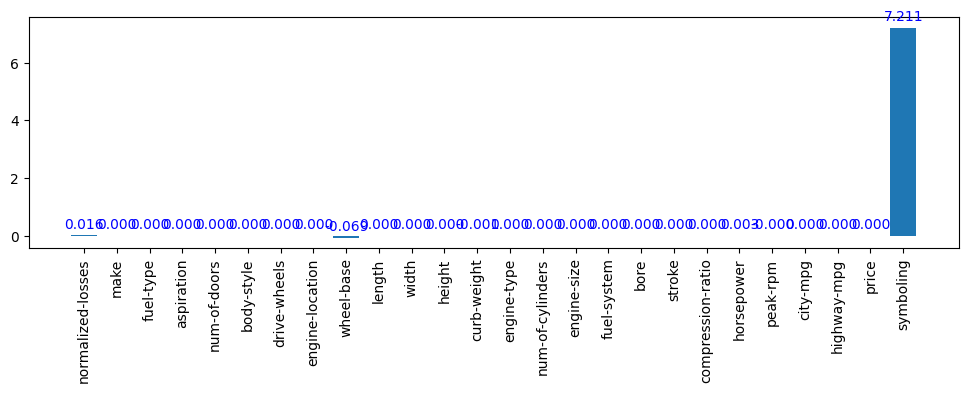

In [82]:
show_weights(model, df.columns.values)

It looks `fuel-type` must have highest conntribution with the large bias. But here let us hold this interpretation. Remember that the scale of input vairables are not similar, which means the current interpretation must be **misleading**. 

For now, let us observe/analyze without considering input scaling. 

# Regularized Linear Models

## Ridge Regression 

Now let's repeat everything we just did but now let's look at using linear regression with regularization. To start off, let's try using ridge regression and see if the result differ at all! 

<div id='TODO11'></div>

### TODO 11-1 (5 points)

1. Create an instance using the proper Sklearn class for conducting ridge regression. Store the output into `model`. 
    1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides. 
2. Train the ridge regression model using the `X_train` and `t_train`.
3. Evaluate the model by computing the test scores using the `score()` method with the `X_test` data and `t_test` targets. Store this value into `test_score`.
4. Using `model`, make a prediction using `predict()` method taking `X_test` as input. Store the output inside `y`
5. Call the `evaluate()` function and observe the results.
6. Call the `show_weights()` function and analyze the weights. 

In [48]:
from sklearn.linear_model import Ridge

# 1) initialize
model = Ridge()

# 2) train the model
model.fit(X_train, t_train)

# 3) evaluate
test_score = model.score(X_test, t_test)

print("Test score: ", test_score)

Test score:  0.3888197852975577


In [49]:
todo_check([
    ('test_score > 0.30', '`test_score` is below .30, try adusting the `alpha` value.')
])

Your code PASSED the code check!


In [50]:
# 4) Predict the values
y = model.predict(X_test)

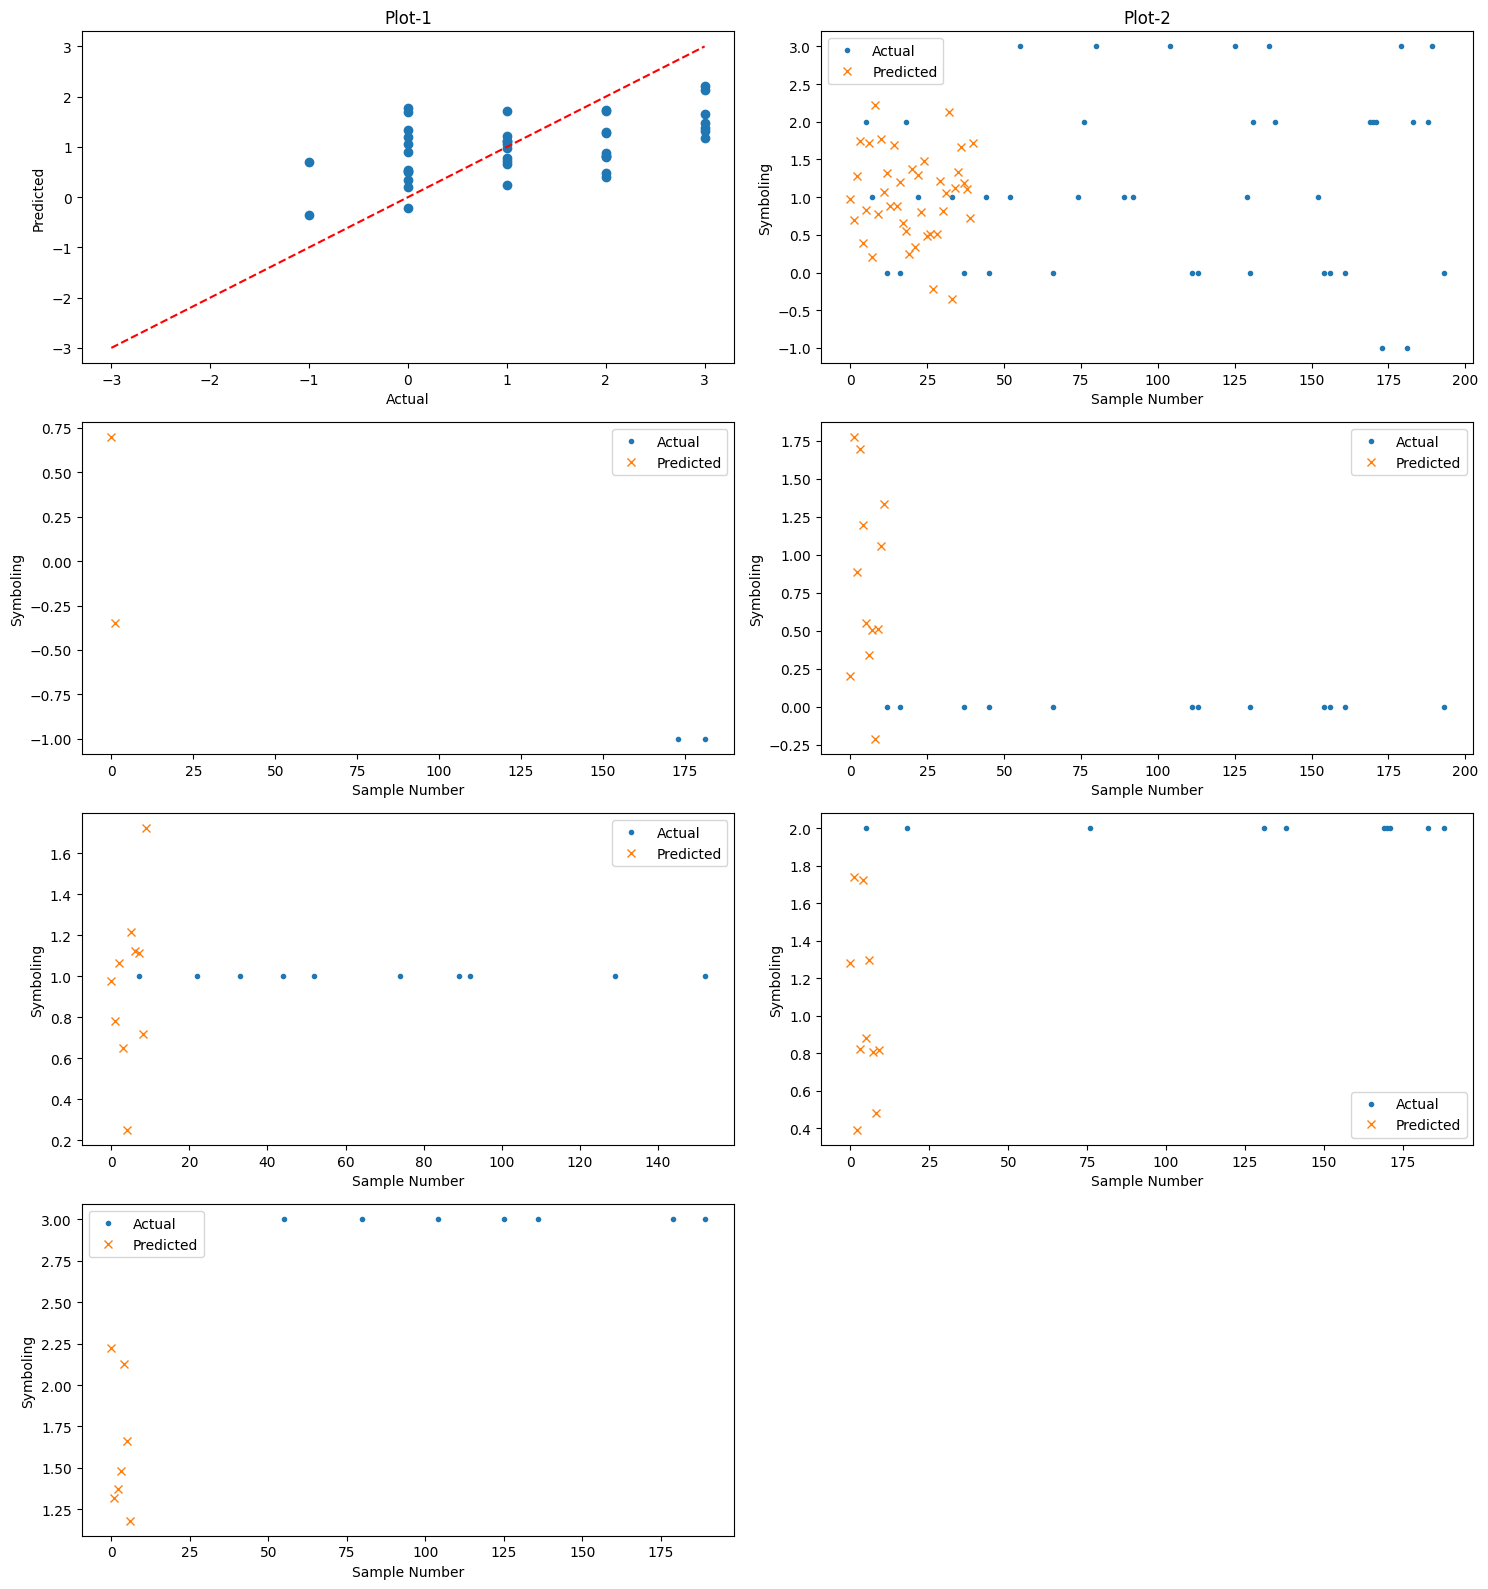

In [69]:
# 5) Plot actual vs predicted graphs
evaluate(y, t_test)

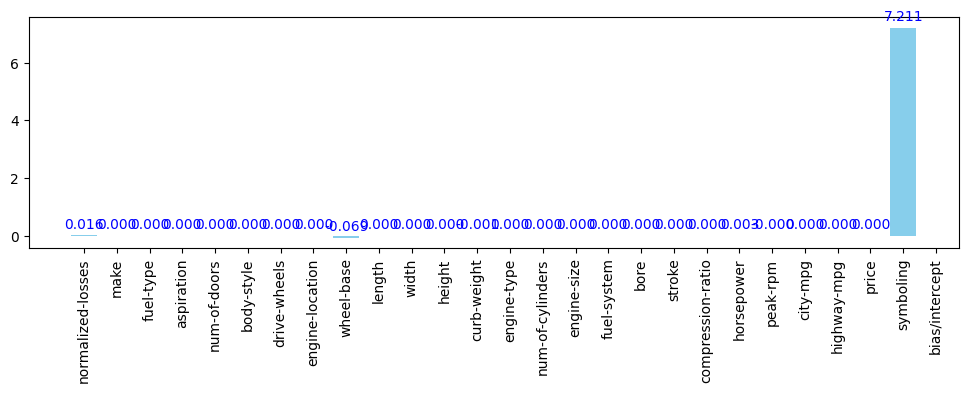

In [70]:
# 6) Plot the weights
show_weights(model, df.columns.values[:-1])

## Lasso Regression 

Now let's try lasso regression!


### TODO 11-2 (5 points)

1. Combine all the process and the modify the code to use Lasso. You can simply copy the four above code cells and modify it to repeat the same process but with Lasso this time.

    1. Create an instance using the proper Sklearn class for conducting lasso regression. Store the output into `model`. 
        1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides. 
    2. Train the lasso regression model using the `X_train` and `t_train`.
    3. Evaluate the model by computing the test scores using the `score()` method with the `X_test` data and `t_test` targets. Store this value into `test_score`.
    4. Using `model`, make a prediction using `predict()` method taking `X_test` as input. Store the output inside `y`
    5. Call the `evaluate()` function and observe the results.
    6. Call the `show_weights()` function and analyze the weights.

Test score:  0.24494919729038422


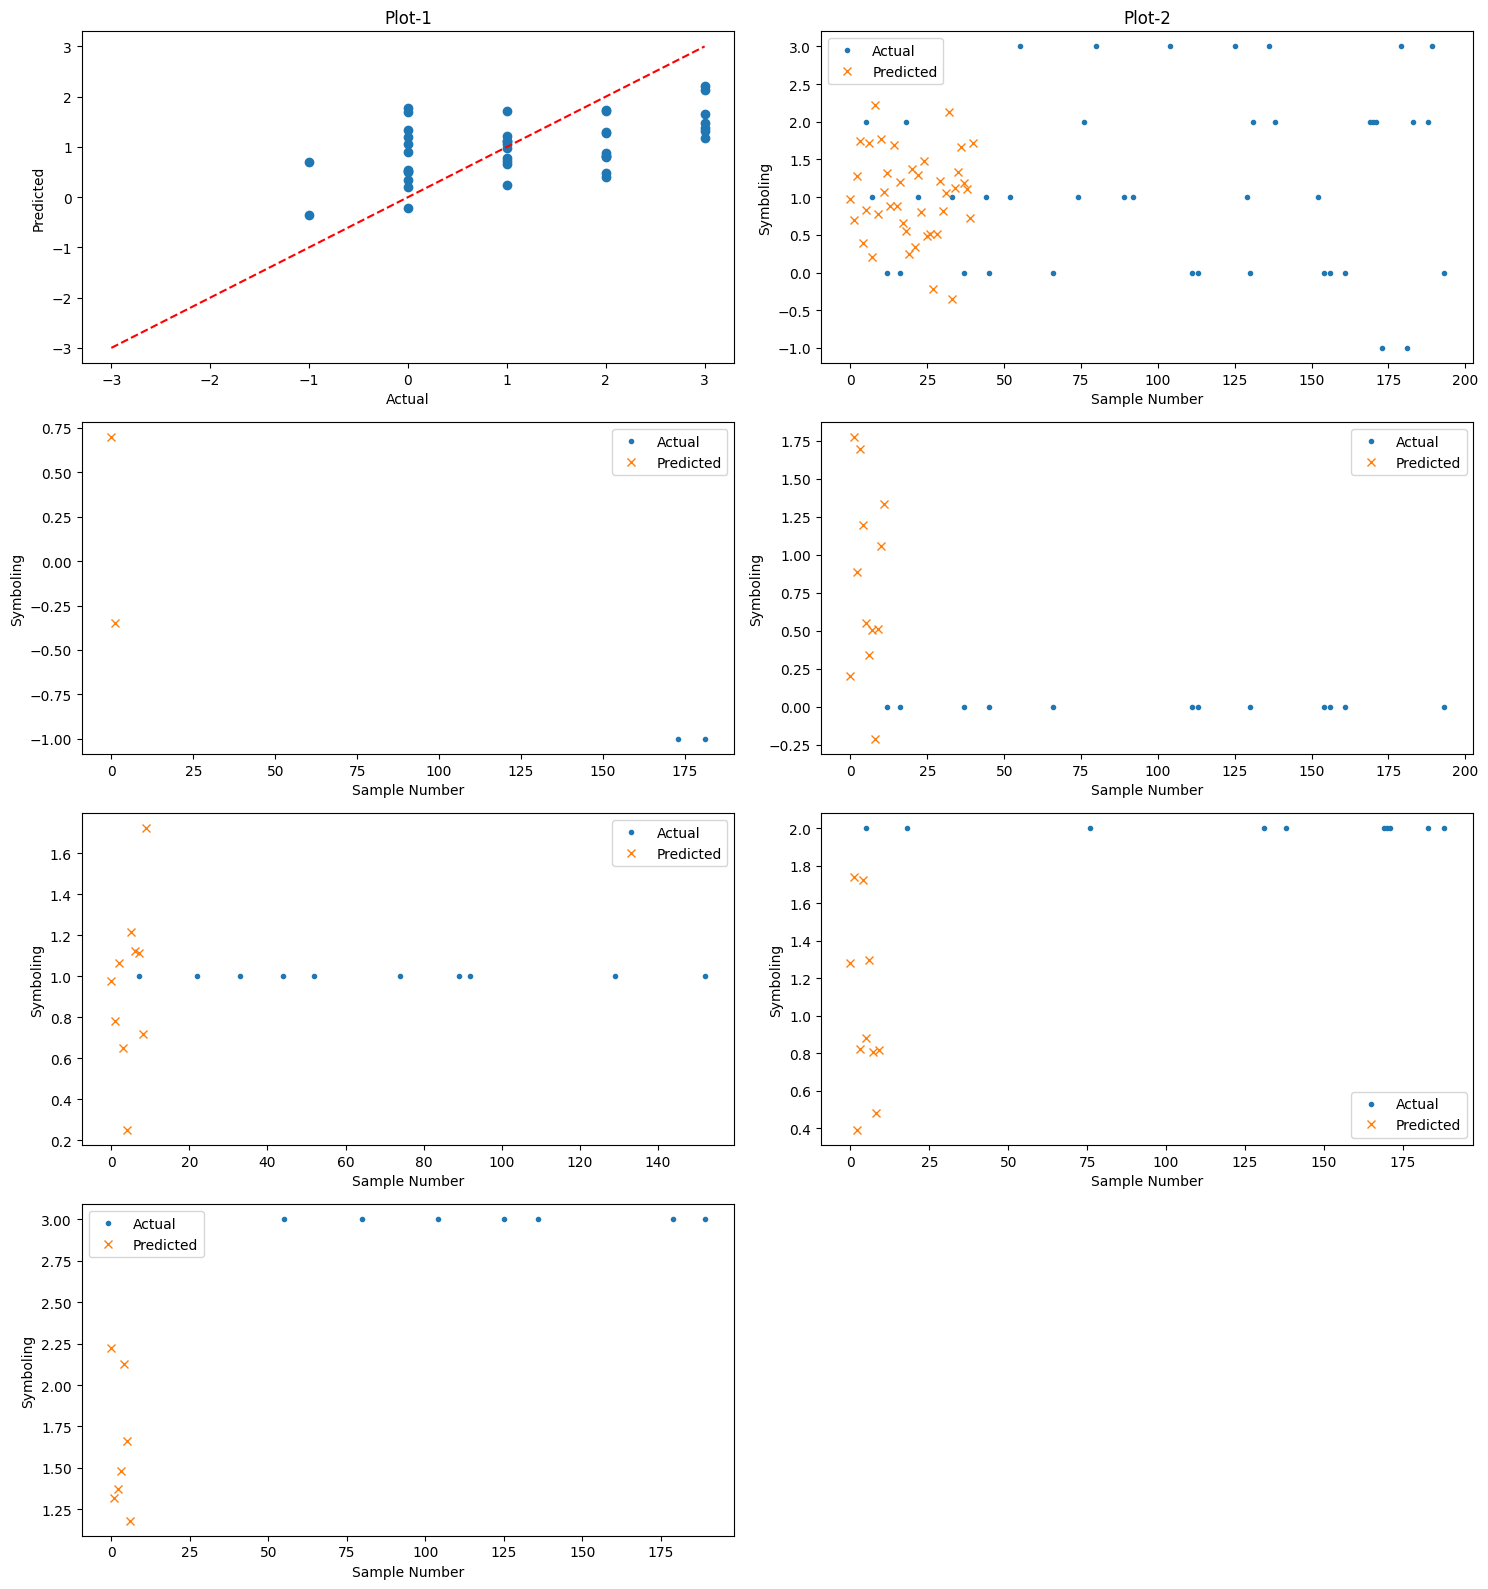

In [66]:
from sklearn.linear_model import Lasso

# 1) initialize
model = Lasso()
# 2) train the model
model.fit(X_train, t_train)
# 3) evaluate
test_score = model.score(X_test, t_test)
print("Test score: ", test_score)

# 4) Predict the values
y = model.predict(X_test)

# 5) Plot actual vs predicted graphs
evaluate(y, t_test)

In [ ]:
todo_check([
    ('test_score > 0.40', '`test_score` is below .40, try adusting the `alpha` value.')
])

## Elastic Net 

### TODO 11-3 (5 points)

1. Combine all the process and the modify the code to use Elastic Net. You can simply copy the above cell and modify it to repeat the same process but with Elastic Net this time.

    1. Create an instance using the proper Sklearn class for elastic net. Store the output into `model`. 
        1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides. 
    2. Train the elastic net model using the `X_train` and `t_train`.
    3. Evaluate the model by computing the test scores using the `score()` method with the `X_test` data and `t_test` targets. Store this value into `test_score`.
    4. Using `model`, make a prediction using `predict()` method taking `X_test` as input. Store the output inside `y`
    5. Call the `evaluate()` function and observe the results.
    6. Call the `show_weights()` function and analyze the weights. 

Test score:  0.26533592494521485


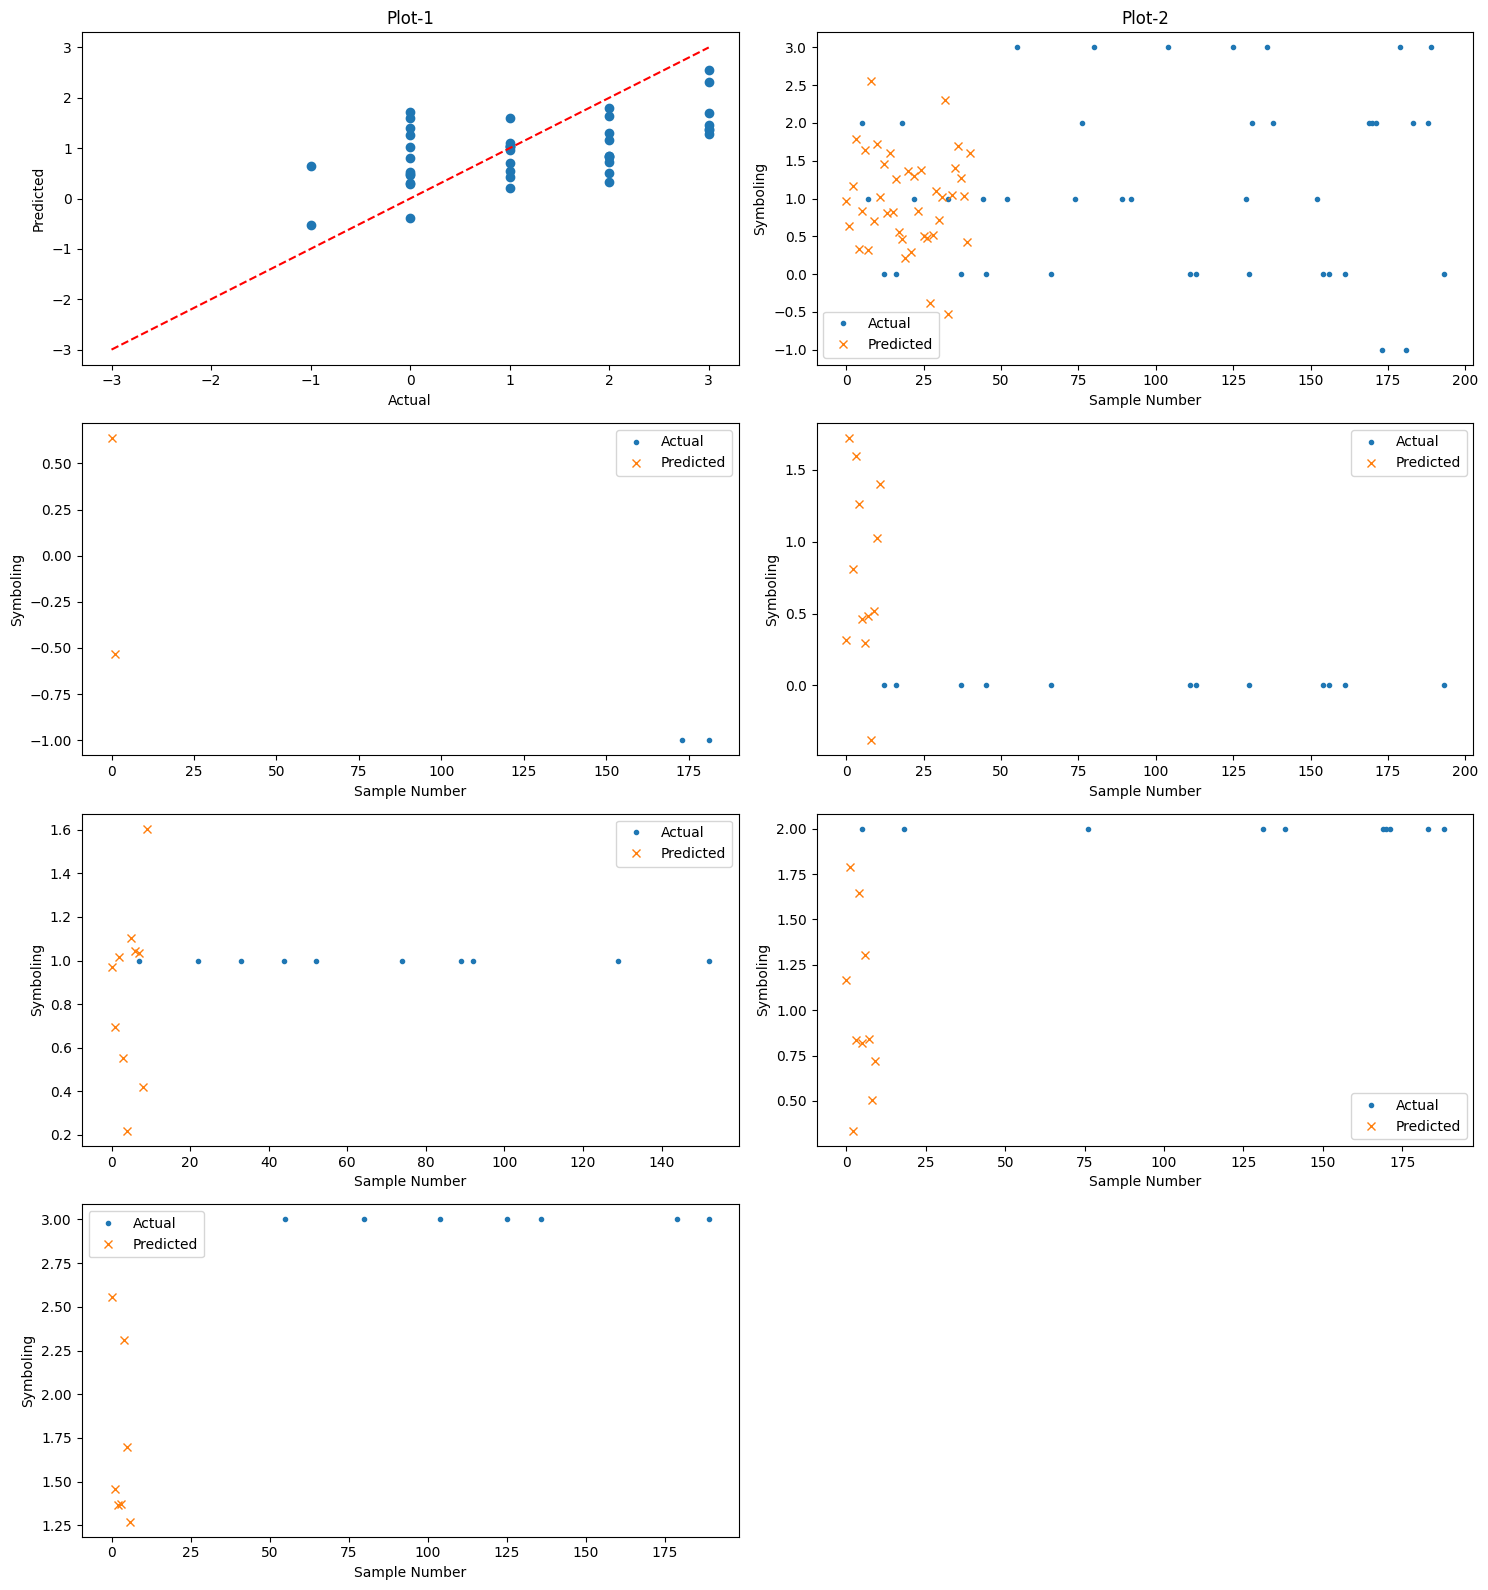

In [55]:
from sklearn.linear_model import ElasticNet

# 1) initialize
model = ElasticNet()
# 2) train the model
model.fit(X_train, t_train)
# 3) evaluate
test_score = model.score(X_test, t_test)
print("Test score: ", test_score)

# 4) Predict the values
y = model.predict(X_test)
# 5) Plot actual vs predicted graphs
evaluate(y, t_test)
# 6) Plot the weights


In [ ]:
todo_check([
    ('test_score > 0.40', '`test_score` is below .40, try adusting the `alpha` value.')
])

Your code PASSED the code check!


## Stochastic Gradient Descent

### TODO 11-4 (5 points)

1. Combine all the process and the modify the code to use SGD. You can simply copy the above cell and modify it to repeat the same process but with SGD this time.

    1. Create an instance using the proper Sklearn class for conducting SGD. Store the output into `model`. 
        1. Hint: Make sure to import and use the right class. You can find the correct class to import and use by referring to the slides. 
    2. Train the SGD model using the `X_train` and `t_train`.
    3. Evaluate the model by computing the test scores using the `score()` method with the `X_test` data and `t_test` targets. Store this value into `test_score`.
    4. Using `model`, make a prediction using `predict()` method taking `X_test` as input. Store the output inside `y`
    5. Call the `evaluate()` function and observe the results.
    6. Call the `show_weights()` function and analyze the weights.

Test score:  0.26533592494521485


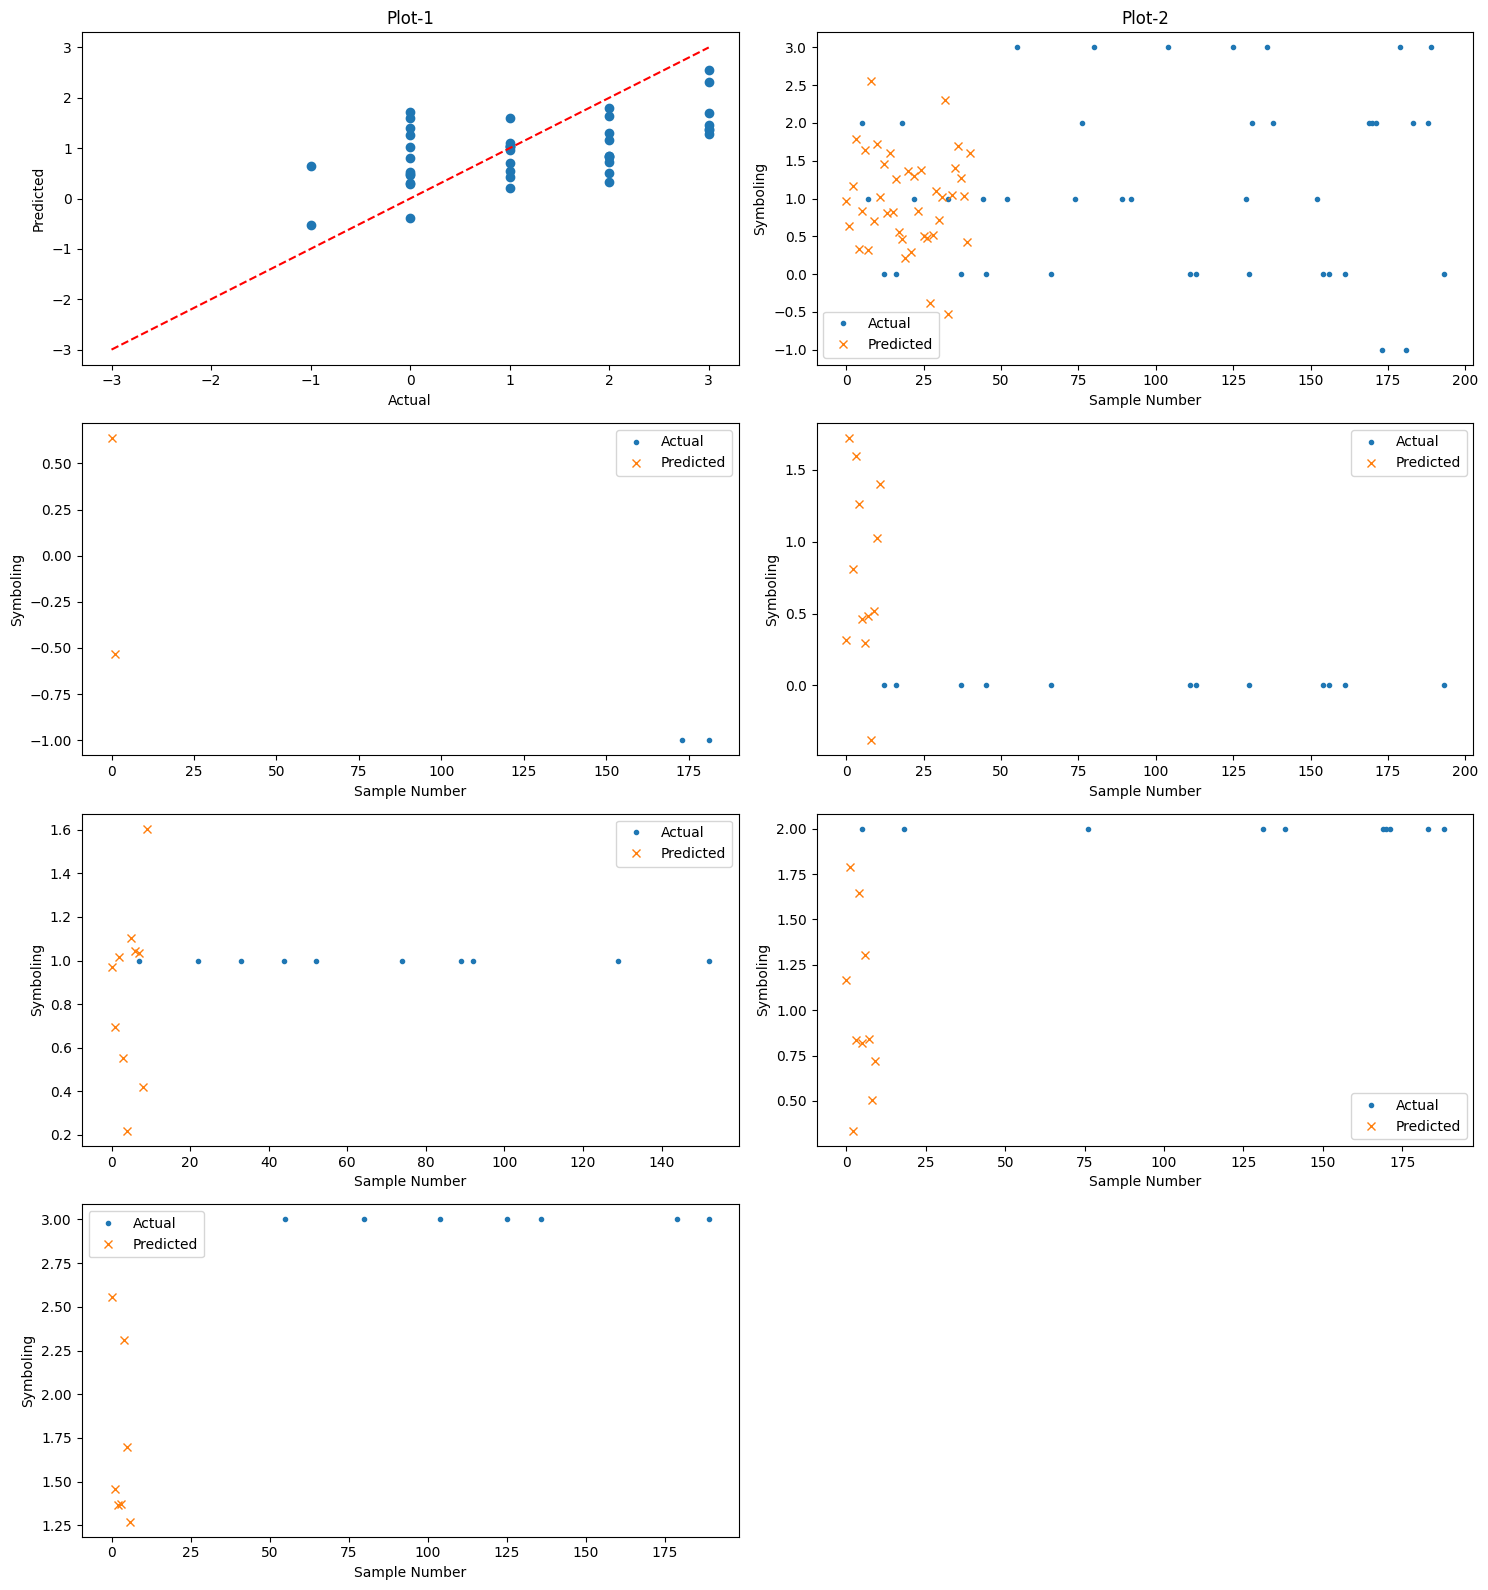

In [58]:
from sklearn.linear_model import SGDRegressor

# 1) initialize
model = ElasticNet()
# 2) train the model
model.fit(X_train, t_train)
# 3) evaluate
test_score = model.score(X_test, t_test)
print("Test score: ", test_score)

# 4) Predict the values
y = model.predict(X_test)
# 5) Plot actual vs predicted graphs
evaluate(y, t_test) 

In [ ]:
todo_check([
    ('test_score < 0', '`test_score` should be an extreme negative vaue')
])

Your code PASSED the code check!


<div id="TODO12"></div>

### TODO 12 (5 points)

Write your thoughts about the plots above. Pay attention to the values of the weights, the predictions, and the test score we got.

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:` In most cases the predicted values dont match up up with the actual values in almost all the models the tha actual values were more spread out while the predicted ones were more conjuncted

# Streamlit 

<div id='TODO13'> </div>

### TODO 13 (10 points)

Let us streamlit the models for comparison by using `evaluate` and `show_weights`. 
Your final interface does not need to be exactly same but to secure an credit, you need to 
1. Include all the models we practiced
2. The parameters are controllable so you can observe the effects of choosing different values interactively. 
3. You should use both `evaluate` and `show_weights` at minimum.

In [84]:
%%writefile automobile_linearReg.py


import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# TODO: Import all the linear regression models that you used here
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


# SETTING PAGE CONFIG TO WIDE MODE
st.set_page_config(layout="wide")

# LOADING DATA
DATA_URL = (
    "https://archive.ics.uci.edu/static/public/10/data.csv"
)

"""
# 1985 Auto Imports Database

Abstract: This data set consists of three types of entities: 
        (a) the specification of an auto in terms of various characteristics, 
        (b) its assigned insurance risk rating, 
        (c) its normalized losses in use as compared to other cars. The second rating 
        corresponds to the degree to which the auto is more risky than its price indicates. 
        Cars are initially assigned a risk factor symbol associated with its
        price.   Then, if it is more risky (or less), this symbol is
        adjusted by moving it up (or down) the scale.  Actuarians call this
        process "symboling".  A value of +3 indicates that the auto is
        risky, -3 that it is probably pretty safe.
"""

@st.cache_data
def load_data(nrows):
    # TODO: Import the data, preprocess it, and seperate it into training and testing data
    df = pd.read_csv('data.csv')
    df.dropna(inplace=True)  
    df = pd.get_dummies(df, drop_first=True)
    
    X = df.drop('symboling', axis=1)  
    t = df['symboling']  
    
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)
    
    return df, X_train, X_test, t_train, t_test

df, X_train, X_test, t_train, t_test = load_data(1000)



"## Summary"    
st.dataframe(df.describe())

def evaluate(model, X_test, t_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(t_test, predictions)
    r2 = r2_score(t_test, predictions)
    fig, ax = plt.subplots()
    ax.text(0.5, 0.5, f'MSE: {mse:.2f}\nR²: {r2:.2f}', fontsize=12, ha='center')
    ax.axis('off')
    return fig


def show_weights(model, feature_names):
    weights = model.coef_
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(feature_names, weights)
    ax.set_xlabel('Weight')
    ax.set_ylabel('Feature')
    ax.set_title('Feature Weights')
    plt.tight_layout()
    return fig


model_option = st.selectbox("Select model", ["Linear Regression", "Ridge", "Lasso", "ElasticNet", "SGDRegressor"])

if model_option == "Linear Regression":
    model = LinearRegression()
elif model_option == "Ridge":
    alpha = st.slider("alpha", 0.01, 1.0, 0.1)
    model = Ridge(alpha=alpha)
elif model_option == "Lasso":
    alpha = st.slider("alpha", 0.01, 1.0, 0.1)
    model = Lasso(alpha=alpha)
elif model_option == "ElasticNet":
    alpha = st.slider("alpha", 0.01, 1.0, 0.1)
    l1_ratio = st.slider("l1_ratio", 0.0, 1.0, 0.5)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elif model_option == "SGDRegressor":
    alpha = st.slider("alpha", 0.01, 1.0, 0.1)
    learning_rate = st.selectbox("Learning Rate", ["constant", "optimal", "invscaling", "adaptive"])
    model = SGDRegressor(alpha=alpha, learning_rate=learning_rate)

model.fit(X_train, t_train)

"## Model Evaluation"
st.pyplot(evaluate(model, X_test, t_test))

"## Model Weights"
st.pyplot(show_weights(model, df.columns[:-1]))  

Overwriting automobile_linearReg.py


### Expected Output:


![image.png](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/lab3-streamlit.png)

<div id="feedback"></div>

## Feedback (2 points)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER`  2

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` TODO 10s and 13

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER`  needed more help with the weighted graphs